# Titanic Dataset classifcation

# Packages

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.ensemble._weight_boosting")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

# Load data

In [2]:
train_df = pd.read_csv('preprocessed_train.csv')

# Prepare features and target

In [3]:
x_train = train_df.drop(["Survived"], axis=1)
y_train = train_df["Survived"]

# Split data

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Initialize models

In [5]:
lr = LogisticRegression(random_state=42, max_iter=1000)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2))
xgb = XGBClassifier(eval_metric='logloss')

# Parameter grids

In [6]:
params_knn = {'n_neighbors': np.arange(1, 50)}
params_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 50),
    'min_samples_leaf': [1, 2, 4, 5, 10, 20, 30, 40, 50, 80, 100]
}
params_rf = {
    'n_estimators': [100, 200, 350, 500],
    'min_samples_leaf': [2, 10, 30, 50, 80, 100]
}
params_ada = {
    'algorithm': ['SAMME'],
    'n_estimators': [50, 100, 250, 400, 500],
    'learning_rate': [0.1, 0.001, 0.2, 0.5, 0.8, 1]
}
params_xgb = {
    'n_estimators': [50, 100, 250, 600, 800, 1000],
    'learning_rate': [0.1, 0.001, 0.2, 0.5, 0.8, 1]
}

# Initialize search objects

In [7]:
grid_knn = GridSearchCV(knn, param_grid=params_knn, cv=5)
grid_dt = GridSearchCV(dt, param_grid=params_dt, cv=5)
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)
grid_ada = GridSearchCV(ada, param_grid=params_ada, cv=5)
rs_xgb = RandomizedSearchCV(xgb, param_distributions=params_xgb, cv=5)

# Fit models

In [8]:
grid_knn.fit(x_train, y_train);
grid_dt.fit(x_train, y_train);
grid_rf.fit(x_train, y_train);
grid_ada.fit(x_train, y_train);
rs_xgb.fit(x_train, y_train);

# Print best parameters

In [9]:
print("\nBest parameters found:")
print("K-Nearest Neighbors:", {"n_neighbors": int(grid_knn.best_params_['n_neighbors'])})
print("Decision Tree:", {k: int(v) if isinstance(v, np.integer) else v for k, v in grid_dt.best_params_.items()})
print("Random Forest:", grid_rf.best_params_)
print("AdaBoost:", grid_ada.best_params_)
print("XGBoost:", rs_xgb.best_params_)


Best parameters found:
K-Nearest Neighbors: {'n_neighbors': 21}
Decision Tree: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 5}
Random Forest: {'min_samples_leaf': 2, 'n_estimators': 500}
AdaBoost: {'algorithm': 'SAMME', 'learning_rate': 0.8, 'n_estimators': 100}
XGBoost: {'n_estimators': 600, 'learning_rate': 0.1}


# Get best estimators

In [10]:
knn_best = grid_knn.best_estimator_
dt_best = grid_dt.best_estimator_
rf_best = grid_rf.best_estimator_
ada_best = grid_ada.best_estimator_
xgb_best = rs_xgb.best_estimator_

In [11]:
lr.fit(x_train, y_train);

# Classifiers for evaluation

In [12]:
classifiers = [
    ('K-Nearest Neighbors', knn_best),
    ('Logistic Regression', lr),
    ('Decision Tree', dt_best),
    ('Random Forest', rf_best),
    ('AdaBoost', ada_best),
    ('XGBoost', xgb_best)
]

# Evaluate models

MODEL EVALUATION RESULTS

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.92      0.76       110
           1       0.62      0.22      0.32        69

    accuracy                           0.65       179
   macro avg       0.64      0.57      0.54       179
weighted avg       0.64      0.65      0.59       179



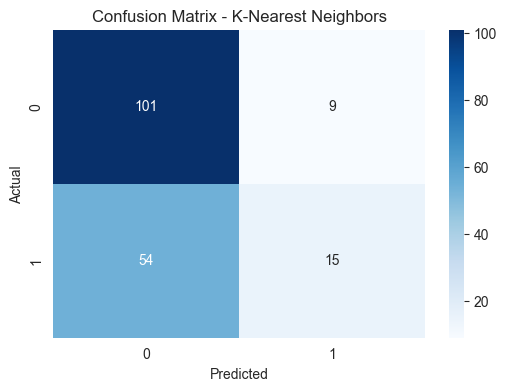


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       110
           1       0.71      0.71      0.71        69

    accuracy                           0.78       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179



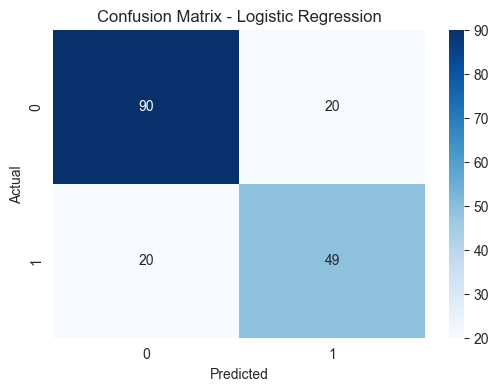


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       110
           1       0.67      0.57      0.61        69

    accuracy                           0.73       179
   macro avg       0.71      0.70      0.70       179
weighted avg       0.72      0.73      0.72       179



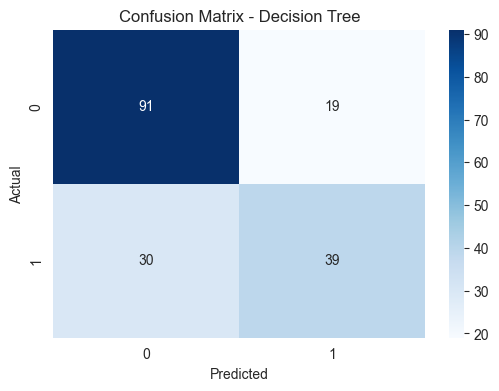


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       110
           1       0.73      0.64      0.68        69

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179



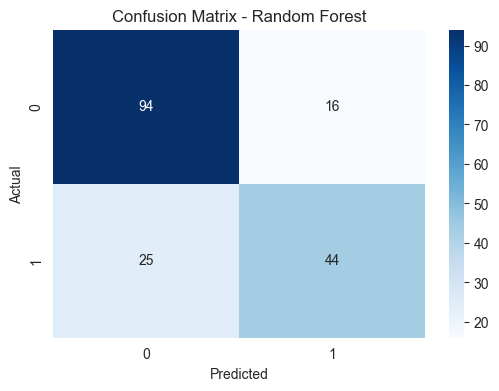


AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.82       110
           1       0.73      0.62      0.67        69

    accuracy                           0.77       179
   macro avg       0.76      0.74      0.74       179
weighted avg       0.76      0.77      0.76       179



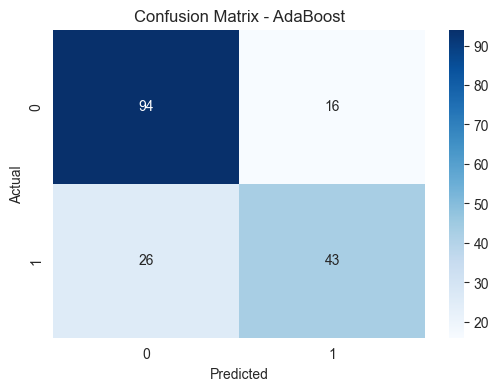


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       110
           1       0.63      0.62      0.63        69

    accuracy                           0.72       179
   macro avg       0.70      0.70      0.70       179
weighted avg       0.71      0.72      0.71       179



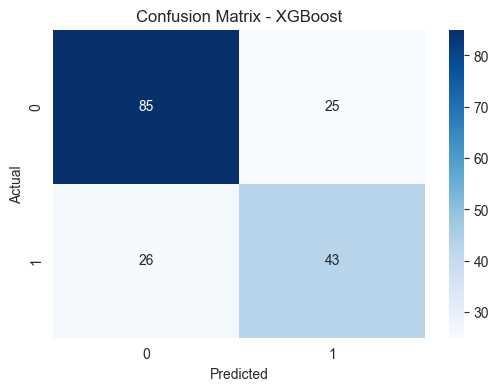

In [14]:

print("MODEL EVALUATION RESULTS")

scores = {
    'accuracy_scores': {},
    'f1_scores': {}
}

for classifier_name, classifier in classifiers:
    # Note: Models are already fitted, but we'll keep this for consistency
    y_pred = classifier.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    scores['accuracy_scores'][classifier_name] = accuracy

    f1 = f1_score(y_test, y_pred)
    scores['f1_scores'][classifier_name] = f1

    print(f'\n{classifier_name} Classification Report:')
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {classifier_name}')
    plt.show()

# Create results dataframe

In [15]:
df = pd.DataFrame(scores)
print("\nFinal Results Summary:")
print(df)


Final Results Summary:
                     accuracy_scores  f1_scores
K-Nearest Neighbors         0.648045   0.322581
Logistic Regression         0.776536   0.710145
Decision Tree               0.726257   0.614173
Random Forest               0.770950   0.682171
AdaBoost                    0.765363   0.671875
XGBoost                     0.715084   0.627737
